<a href="https://colab.research.google.com/github/JuniorTorresMTJ/Bootcamp_Alura_2/blob/main/notebook/Analisando_Dados_S%C3%A1ude_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
ANALISANDO DADOS DA SAÚDE COM PYTHON E PANDAS
***

#Bibliotecas

In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

#Aula 01 - Aquisição e leitura de dados reais

##Carregando a Base

A nossa base está muito suja, para isso precisamos arrumar algumas coisas como: 

- ignorar as primeras e ultimas linhas
- mudar o enconding dos dados 
- mudar o ponto e virgulas dos nossos dados 
- informar que é separado por ";"

In [157]:
dados = pd.read_csv("https://github.com/JuniorTorresMTJ/Bootcamp_Alura_2/blob/main/dados/A151346189_28_143_208.csv?raw=True", encoding="ISO-8859-1", 
            skiprows=3, sep=";", skipfooter = 12, thousands=".", decimal ="," )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


In [158]:
dados.describe()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
count,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,...,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00
mean,15126846.64,22710158.12,24594187.35,25431957.83,26511245.91,27858576.43,28332973.51,27800320.31,27887505.26,27148854.29,24748781.93,28739553.21,27779578.57,28021517.95,31180857.91,30559470.48,32067740.96,31580672.71,32611202.77,33068227.21,32419807.37,32189393.28,31167981.22,31560092.18,29928809.93,32999254.94,33416032.93,33861926.64,32998566.05,33776633.08,34508112.22,33571030.22,33202549.09,34260578.08,33722132.00,33068418.63,32743959.68,34540839.00,34834165.09,35148078.99,...,46592572.02,44858620.70,46445335.60,46943697.67,45819920.30,46310661.30,45372052.00,44512155.12,45130688.08,42984468.06,46280398.95,46872938.71,47404348.88,47142979.23,48204529.71,48763775.45,47130713.08,47999574.50,46453738.64,45127706.24,47713863.09,45430176.33,47199783.51,48164467.53,50274331.13,48455666.28,50858976.35,51086007.98,49509771.01,51159255.15,48652124.79,47233303.11,49148617.53,47618476.39,47593665.11,41013660.39,44193633.75,47329994.46,54495511.57,5993731798.30
std,19159188.30,30879444.07,32516725.69,33339066.25,37540771.63,38676893.04,39292968.91,37748913.80,38226540.65,36671387.56,34302651.64,39263230.84,37988016.94,38472973.83,43107877.67,41375865.01,43820473.72,43730638.41,44931951.46,46760267.58,44723736.91,44657514.59,42490731.84,43451336.50,41128727.38,45902372.56,46619168.65,46583768.83,45800691.66,46621043.56,47569222.69,47049920.20,45173519.54,48351100.75,47965880.74,46035492.78,46621888.15,48716789.21,47927983.93,49430916.96,...,62025560.03,57705113.72,62349149.63,62507148.99,59281419.38,60178793.71,59424265.29,58898151.60,59061757.59,56509401.30,60497498.93,61142944.73,61925710.33,61154374.79,62216643.96,63370716.30,60726402.82,62486400.14,60454412.46,59916454.67,62828831.11,59362996.81,61110607.09,62936176.09,64576982.68,62355902.11,65323980.41,66360324.67,63439145.10,66313422.91,62260089.17,60600178.14,64234554.84,61318083.40,62171030.87,52900705.99,56856933.02,62255310.10,73974287.16,8057806560.09
min,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,1056218.71,1244339.25,1085679.25,969528.54,1393226.70,1273734.17,1552638.50,1490587.74,1596751.80,1746538.99,1164711.18,1434809.17,1603817.28,1437340.80,1332094.01,1525752.37,1572809.36,1653304.86,1685303.78,1773604.15,1643518.23,1811346.65,1654294.56,1674871.65,1250999.28,1257275.43,1171045.72,1389668.67,1344865.94,1067658.62,...,1897787.14,2050824.29,1881406.55,1940174.73,1923150.03,2036787.91,1876731.42,1716855.56,1836149.63,1954823.32,1882553.32,1781034.49,1821567.42,2120412.72,1910968.09,2453555.40,2619709.86,2637161.32,2139141.93,2123426.26,2527888.58,1906429.95,1923440.17,2411628.00,2495491.03,2117098.07,2388704.49,2905190.27,2145557.83,2455947.45,2310514.38,2296699.42,2333822.65,2310195.65,1842472.54,1705873.64,2065055.35,20

Os números estão em notação cientifica, com isso fica muito difícil fazer a leitura e interpretação dos dados. 

In [159]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 154 entries, Unidade da Federação to Total
dtypes: float64(151), object(3)
memory usage: 32.6+ KB


Vamos mudar o formato dos números

In [160]:
pd.options.display.float_format ="{:.2f}".format

In [161]:
dados.mean()

2008/Jan     15126846.64
2008/Fev     22710158.12
2008/Mar     24594187.35
2008/Abr     25431957.83
2008/Mai     26511245.91
                ...     
2020/Abr     41013660.39
2020/Mai     44193633.75
2020/Jun     47329994.46
2020/Jul     54495511.57
Total      5993731798.30
Length: 151, dtype: float64

In [162]:
dados["2008/Ago"].head(9)

0    3231494.61
1    2089107.14
2    9352532.70
3     894271.18
4   23341218.03
5    1475551.38
6    5413710.38
7   15195312.89
8   10549176.40
Name: 2008/Ago, dtype: float64

In [163]:
dados["2008/Ago"].mean()

27800320.306666665

In [164]:
Ago = dados["2008/Ago"].sort_values(ascending = False)
Ago

19   184854516.35
16    84722528.10
20    56982774.90
22    56113054.70
18    50912706.60
15    46931248.28
12    35457038.66
21    31250854.33
9     27851438.72
4     23341218.03
25    20650730.67
7     15195312.89
26    13710857.89
11    12872578.37
17    12588595.77
10    10640817.47
8     10549176.40
23     9671553.45
13     9373432.00
2      9352532.70
24     9243148.81
6      5413710.38
14     5238398.50
0      3231494.61
1      2089107.14
5      1475551.38
3       894271.18
Name: 2008/Ago, dtype: float64

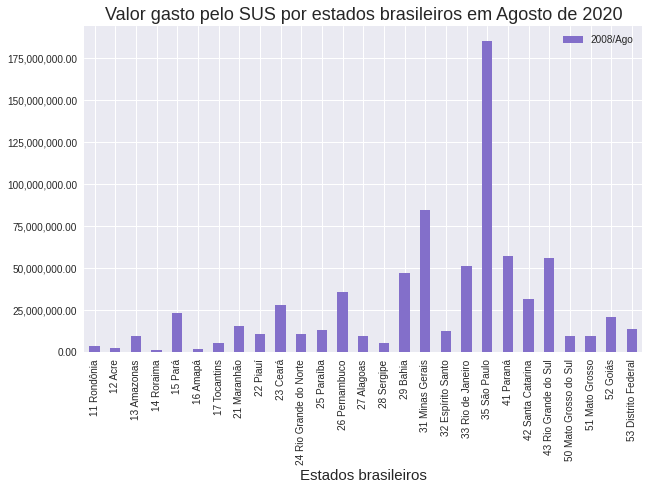

In [165]:
ax = dados.plot(x="Unidade da Federação", y="2008/Ago", kind="bar", color="#836fca", figsize =(10,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.title("Valor gasto pelo SUS por estados brasileiros em Agosto de 2020", size=18)
plt.xlabel("Estados brasileiros", size = 15)
plt.show()

Veja que no eixo X ficou o index da uf, mas isso não traz informação nenhuma para a nossa visualização, vamos tirar e colocar em outras coluna. 

##Arrumando os estados

Para isso vamos fazer slices,e criar uma nova coluna em nosso dataframe chamada `id_uf`

In [166]:
dados['id_uf'] = dados["Unidade da Federação"].str.slice(0,3)
dados['id_uf']

0     11 
1     12 
2     13 
3     14 
4     15 
5     16 
6     17 
7     21 
8     22 
9     23 
10    24 
11    25 
12    26 
13    27 
14    28 
15    29 
16    31 
17    32 
18    33 
19    35 
20    41 
21    42 
22    43 
23    50 
24    51 
25    52 
26    53 
Name: id_uf, dtype: object

In [167]:
dados["Unidade da Federação"] = dados["Unidade da Federação"].str.slice(3,)

In [168]:
dados.head()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total,id_uf
0,Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,2825838.52,2931173.58,2885269.07,2860103.74,3684944.68,3607289.68,3774356.60,3706711.84,3763187.55,3533625.83,3605007.43,3907032.72,3939820.71,3901084.11,3684407.02,3623015.58,3890461.90,4193533.87,4534400.67,4451208.03,4874592.78,4460802.38,5067886.24,4511092.85,4394680.50,4098741.80,4411499.48,3868617.95,4298702.78,...,8438077.45,7656644.83,8047742.98,8657206.23,8150893.68,7507845.13,7998345.94,8893683.69,8867793.32,8871408.50,8501601.67,8315107.81,8525499.78,9177611.46,7368996.38,8835095.43,8328186.64,8408512.77,9351705.82,8143007.97,8949741.77,9630553.15,9581970.31,7891114.05,9792370.67,9170787.53,8816846.71,10024554.15,9675423.70,8085025.66,9221412.18,7493310.88,8092260.11,7273843.63,7652120.28,8725530.68,11152107.08,10285455.78,929129659.72,11
1,Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,1756986.80,2235639.98,2497116.43,2253558.01,2122673.92,2834317.62,2722065.97,2432831.95,2630190.65,2307579.00,-,2826477.02,2170791.18,2541526.44,2491042.33,1954473.90,2389996.38,2654878.60,2844085.21,2336207.19,2125143.06,2430293.67,2377738.44,2184746.84,2468452.90,2516284.54,3051370.08,2629104.42,2485451.79,...,2348760.00,3139155.41,2765062.92,4540084.78,4120228.96,2610454.55,3576595.19,2444567.37,2602434.35,3064163.42,2276236.69,3239474.10,3126429.88,2998865.51,2619709.86,3018048.94,3342614.24,2123426.26,2664654.52,1906429.95,3096439.63,2411628.00,2840630.58,3260153.59,3250722.84,3204998.88,3052745.65,3124802.29,3021521.75,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,-,420668039.63,12
2,Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,6555549.08,7777645.88,7403068.36,6683346.89,9927781.20,8844511.21,9079035.96,8832894.53,9373395.97,9578326.03,9730634.16,9179252.65,8314648.93,9050439.39,9419460.86,8680178.57,9168055.41,9897901.80,9651362.37,10854599.47,10417122.89,8718347.13,8221592.12,9613977.03,9927574.41,9470661.21,9736750.91,8745259.80,9380112.36,...,14376990.41,14240071.26,13594647.25,14584288.95,13158724.61,13169660.32,13572263.03,13083081.70,14322305.22,14643340.51,14632208.09,14500521.14,14840533.42,14427620.91,15818964.25,16358462.57,15391163.74,14154362.85,16791397.31,14369987.43,16339024.96,15622910.63,16483166.92,15422243.28,15961988.04,15787896.78,16515441.67,15731201.23,15744605.61,14346553.60,16018459.07,14913745.37,15068304.35,13509579.29,19658585.46,20897542.93,19346450.18,14726443.67,1771654871.23,13
3,Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,1056218.71,1244339.25,1085679.25,969528.54,1393226.70,1273734.17,1552638.50,1490587.74,1596751.80,1848998.68,1701611.25,1164711.18,1434809.17,1603817.28,1437340.80,1332094.01,1900513.75,1933875.49,1773958.29,1804729.73,1846639.32,1643518.23,1843163.29,1807885.17,1674871.65,1250999.28,1257275.43,1171045.72,1389668.67,...,2878177.60,2921978.36,2794080.79,2512259.50,2508514.18,2635287.45,2914195.21,2881281.13,2740423.51,2695484.62,2613895.43,3020718.84,2860584.22,2740088.01,2689103.41,2985029.23,27718

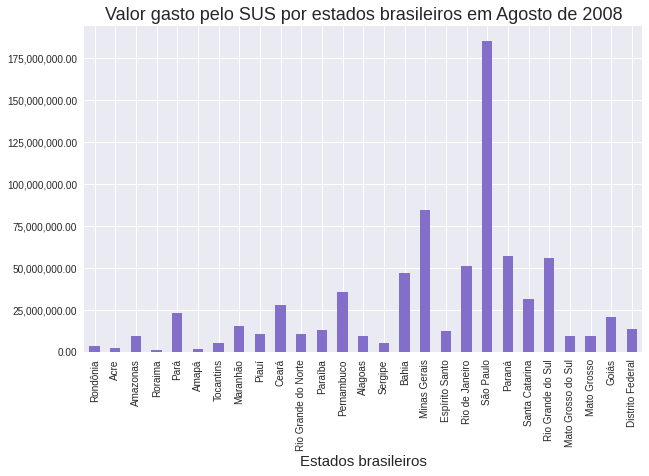

In [169]:
ax = dados.plot(x="Unidade da Federação", y="2008/Ago", kind="bar", color="#836fca", figsize =(10,6), legend=None)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.title("Valor gasto pelo SUS por estados brasileiros em Agosto de 2008", size=18)
plt.xlabel("Estados brasileiros", size = 15)
plt.show()

Agora vamos plotar o mês mais recente desse dataset que é o Ago/2020

In [170]:
dados["2020/Ago"]

0      10285455.78
1                -
2      14726443.67
3       2826486.18
4      39911193.02
5       2942273.94
6       8240261.38
7      28587541.78
8      23210624.20
9      59808605.59
10     24929930.72
11     22130016.81
12     75704177.72
13     19754741.78
14     11014180.89
15     80793117.08
16    168024412.95
17     32188873.88
18     95274486.35
19    346512263.17
20    129375911.54
21     63972379.36
22    101374341.51
23     19241624.02
24     17790649.87
25     43984702.05
26     26526196.39
Name: 2020/Ago, dtype: object

Como podemos ver agora, na linha do indice 1, ficou faltando um valor, vamos substituir esse valor com a média dos meses anteriores do Acre

In [171]:
dados.mean(axis=1)

0     12214363.29
1      5571762.11
2     23303660.03
3      4009891.85
4     58320213.90
5      3829797.12
6     13147113.01
7     47797427.04
8     27985267.11
9     81459829.85
10    32560268.55
11    32469221.93
12   105829359.82
13    27668112.66
14    14856412.70
15   120880617.10
16   252021705.37
17    41263623.56
18   127453152.46
19   511869497.19
20   181315956.94
21    96336737.40
22   157281422.69
23    28563420.95
24    26789711.91
25    61228397.84
26    31912934.75
dtype: float64

In [172]:
repl = dados['2020/Ago']

In [173]:
repl.replace("-", 5571762.11, inplace=True )

In [174]:
dados.head()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total,id_uf
0,Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,2825838.52,2931173.58,2885269.07,2860103.74,3684944.68,3607289.68,3774356.60,3706711.84,3763187.55,3533625.83,3605007.43,3907032.72,3939820.71,3901084.11,3684407.02,3623015.58,3890461.90,4193533.87,4534400.67,4451208.03,4874592.78,4460802.38,5067886.24,4511092.85,4394680.50,4098741.80,4411499.48,3868617.95,4298702.78,...,8438077.45,7656644.83,8047742.98,8657206.23,8150893.68,7507845.13,7998345.94,8893683.69,8867793.32,8871408.50,8501601.67,8315107.81,8525499.78,9177611.46,7368996.38,8835095.43,8328186.64,8408512.77,9351705.82,8143007.97,8949741.77,9630553.15,9581970.31,7891114.05,9792370.67,9170787.53,8816846.71,10024554.15,9675423.70,8085025.66,9221412.18,7493310.88,8092260.11,7273843.63,7652120.28,8725530.68,11152107.08,10285455.78,929129659.72,11
1,Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,1756986.80,2235639.98,2497116.43,2253558.01,2122673.92,2834317.62,2722065.97,2432831.95,2630190.65,2307579.00,-,2826477.02,2170791.18,2541526.44,2491042.33,1954473.90,2389996.38,2654878.60,2844085.21,2336207.19,2125143.06,2430293.67,2377738.44,2184746.84,2468452.90,2516284.54,3051370.08,2629104.42,2485451.79,...,2348760.00,3139155.41,2765062.92,4540084.78,4120228.96,2610454.55,3576595.19,2444567.37,2602434.35,3064163.42,2276236.69,3239474.10,3126429.88,2998865.51,2619709.86,3018048.94,3342614.24,2123426.26,2664654.52,1906429.95,3096439.63,2411628.00,2840630.58,3260153.59,3250722.84,3204998.88,3052745.65,3124802.29,3021521.75,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,5571762.11,420668039.63,12
2,Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,6555549.08,7777645.88,7403068.36,6683346.89,9927781.20,8844511.21,9079035.96,8832894.53,9373395.97,9578326.03,9730634.16,9179252.65,8314648.93,9050439.39,9419460.86,8680178.57,9168055.41,9897901.80,9651362.37,10854599.47,10417122.89,8718347.13,8221592.12,9613977.03,9927574.41,9470661.21,9736750.91,8745259.80,9380112.36,...,14376990.41,14240071.26,13594647.25,14584288.95,13158724.61,13169660.32,13572263.03,13083081.70,14322305.22,14643340.51,14632208.09,14500521.14,14840533.42,14427620.91,15818964.25,16358462.57,15391163.74,14154362.85,16791397.31,14369987.43,16339024.96,15622910.63,16483166.92,15422243.28,15961988.04,15787896.78,16515441.67,15731201.23,15744605.61,14346553.60,16018459.07,14913745.37,15068304.35,13509579.29,19658585.46,20897542.93,19346450.18,14726443.67,1771654871.23,13
3,Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,1056218.71,1244339.25,1085679.25,969528.54,1393226.70,1273734.17,1552638.50,1490587.74,1596751.80,1848998.68,1701611.25,1164711.18,1434809.17,1603817.28,1437340.80,1332094.01,1900513.75,1933875.49,1773958.29,1804729.73,1846639.32,1643518.23,1843163.29,1807885.17,1674871.65,1250999.28,1257275.43,1171045.72,1389668.67,...,2878177.60,2921978.36,2794080.79,2512259.50,2508514.18,2635287.45,2914195.21,2881281.13,2740423.51,2695484.62,2613895.43,3020718.84,2860584.22,2740088.01,2689103.41,2985029

Agora vamos definir nossa coluna como o tipo de dados **Float64**

In [175]:
dados["2020/Ago"] = dados["2020/Ago"].astype('float64')

##Criando a Visualização

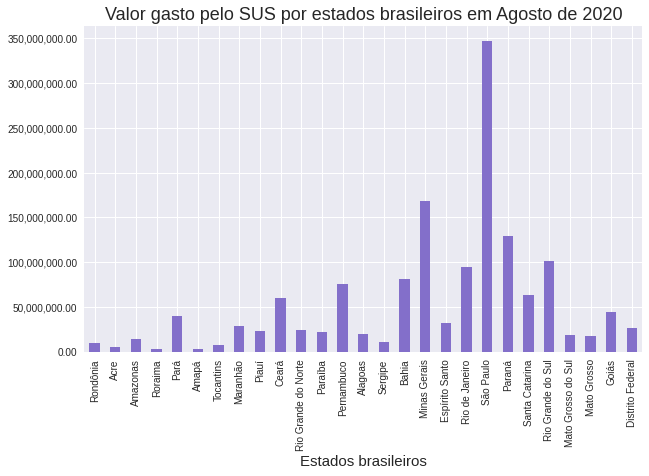

In [176]:
ax = dados.plot(x="Unidade da Federação", y="2020/Ago", kind="bar", color="#836fca", figsize =(10,6),legend=None)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.title("Valor gasto pelo SUS por estados brasileiros em Agosto de 2020", size=18)
plt.xlabel("Estados brasileiros", size = 15)
plt.show()

Agora vamos ordenar por estados

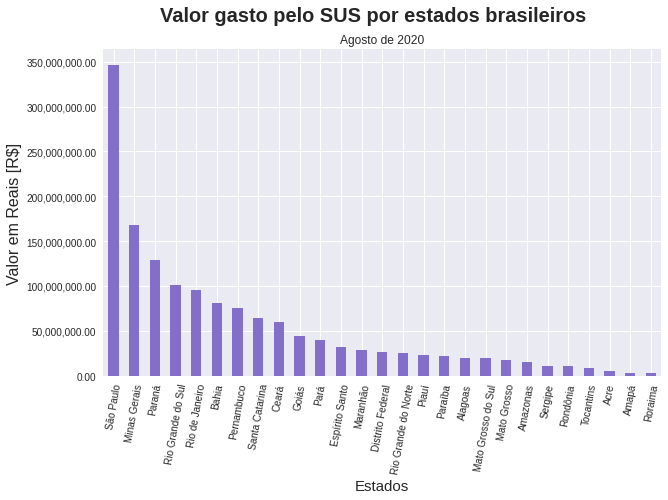

In [177]:
dados_sort = dados[["Unidade da Federação", "2020/Ago"]].sort_values(by = "2020/Ago", ascending = False)

plt.style.use('seaborn')
ax = dados_sort.plot(x="Unidade da Federação", y = "2020/Ago", kind ="bar", figsize=(10,6), legend=None, color="#836fca")
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.title("Agosto de 2020")
plt.suptitle("Valor gasto pelo SUS por estados brasileiros", size=20, weight='bold' )
plt.xlabel("Estados", size = 15)
plt.ylabel("Valor em Reais [R$]", size = 16)
plt.xticks(rotation=80)

plt.show()

#Aula 02 - Primeiras visualizações de dados


##Carregando a Base

In [178]:
data= pd.read_csv("https://github.com/JuniorTorresMTJ/Bootcamp_Alura_2/blob/main/dados/A160324189_28_143_208.csv?raw=True", encoding="ISO-8859-1", 
            skiprows=3, sep=";", skipfooter = 12, thousands=".", decimal =",")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


In [179]:
data.head()

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,3556381.57,929129659.72
1,12 Acre,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,-,420668039.63
2,13 Amazonas,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,4726485.73,1771654871.23
3,14 Roraima,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2699213.85,2682746.28,2891100.20,2737677.78,2693726.29,2671451.53,2688315.70,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,2524712.40,2462451.64,2662240.18,2499996.16,2846135.56,2789823.29,2839389.53,2647540.20,2865777.71,3181321.82,3070436.96,3162342.44,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,1524478.04,305010883.18
4,15 Pará,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,31808597.47,32133134.42,33770556.65,32979925.38,33665042.35,33475545.29,32067934.67,33615836.09,30623491.62,34121931.00,35039954.20,35424611.06,34160283.18,34484949.49,35618364.04,34380916.90,38441090.50,33583538.08,32789354.87,34513534.80,31885919.67,33236155.79,31008924.95,31064106.50,28543179.30,36713929.36,36462011.47,36790758.67,36974859.69,35555518.00,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,11559714.54,4437115730.71


##Arrumando os Estados

In [180]:
data['id_uf'] = data["Unidade da Federação"].str.slice(0,3)
data["Unidade da Federação"] = data["Unidade da Federação"].str.slice(3,)

In [181]:
data[['Unidade da Federação','2008/Ago','2008/Set']].head()

,Unidade da Federação,2008/Ago,2008/Set
0,Rondônia,2938286.29,2843930.91
1,Acre,1886871.84,2084884.80
2,Amazonas,8331763.97,8148089.92
3,Roraima,1045291.11,1003740.89
4,Pará,23259148.28,23667690.01


Inserindo a UF como index

In [182]:
usable = data.mean().index.tolist()
usable.insert(0, "Unidade da Federação")

In [183]:
usable = data[usable]
usable.head()

,Unidade da Federação,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
0,Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,...,8140639.49,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,929129659.72
1,Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,...,3161446.53,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,420668039.63
2,Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,...,13909566.03,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,1771654871.23
3,Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,...,2761536.23,2699213.85,2682746.28,2891100.20,2737677.78,2693726.29,2671451.53,2688315.70,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.

In [184]:
usable = usable.set_index("Unidade da Federação")

In [185]:
usable['2008/Ago']

Unidade da Federação
Rondônia                2938286.29
Acre                    1886871.84
Amazonas                8331763.97
Roraima                 1045291.11
Pará                   23259148.28
Amapá                   1550340.63
Tocantins               5213290.38
Maranhão               14609872.57
Piauí                  10645917.52
Ceará                  29304821.51
Rio Grande do Norte    10812840.19
Paraíba                12673774.35
Pernambuco             31705296.79
Alagoas                 9262767.68
Sergipe                 4543252.50
Bahia                  43254543.33
Minas Gerais           80374117.08
Espírito Santo         12384068.19
Rio de Janeiro         42487939.51
São Paulo             179898070.22
Paraná                 56699001.13
Santa Catarina         28887854.62
Rio Grande do Sul      56233758.74
Mato Grosso do Sul      9602843.49
Mato Grosso             8987811.95
Goiás                  21041071.33
Distrito Federal       11548451.89
Name: 2008/Ago, dtype: float64

In [186]:
usable.loc["Acre"]

2007/Ago       10470.07
2007/Set       14001.71
2007/Out       86200.85
2007/Nov      301323.68
2007/Dez      769612.36
               ...     
2020/Abr     2472063.08
2020/Mai     2383895.48
2020/Jun     2199920.70
2020/Jul     1163813.08
Total      420668039.63
Name: Acre, Length: 157, dtype: float64

Transpondo os dados com o `.T` (mudando coluna para linha)

In [187]:
usable.T.head()

Unidade da Federação,Rondônia,Acre,Amazonas,Roraima,Pará,Amapá,Tocantins,Maranhão,Piauí,Ceará,Rio Grande do Norte,Paraíba,Pernambuco,Alagoas,Sergipe,Bahia,Minas Gerais,Espírito Santo,Rio de Janeiro,São Paulo,Paraná,Santa Catarina,Rio Grande do Sul,Mato Grosso do Sul,Mato Grosso,Goiás,Distrito Federal
2007/Ago,4209.37,10470.07,35752.72,4785.91,181159.29,33672.74,4113.76,385330.18,220788.25,357904.65,134605.36,97352.78,400640.85,104243.75,27453.63,135146.36,971394.37,57408.11,469469.34,1665349.90,554800.22,693955.05,1049252.33,199556.12,63562.50,179395.82,191951.47
2007/Set,16397.03,14001.71,45570.64,11858.63,433414.74,104822.98,76633.06,1018352.93,353468.67,572356.18,272088.08,368130.43,1088340.42,174024.90,78565.19,448349.75,2861781.50,284224.80,921646.57,4434168.64,1431708.01,1092964.12,3182913.14,573675.41,232444.62,418053.58,769966.25
2007/Out,133645.19,86200.85,416012.30,43852.67,1893197.50,118378.28,343702.61,2277717.78,1078182.68,1865065.71,684678.30,1002088.64,2973553.48,595544.54,122952.94,1382038.11,10018011.35,1152115.25,2994664.57,14577395.84,4630402.44,3562300.82,8571312.11,1069816.66,927219.59,1198730.25,2165619.56
2007/Nov,346912.84,301323.68,2020381.79,369328.51,5105406.44,226661.18,1068685.94,4334468.23,2406035.32,5131814.39,1695824.89,2149873.40,6699828.82,1125396.73,775705.52,3348779.62,21730281.63,2296383.23,7250528.08,35032259.98,11120030.79,7578502.38,16592432.80,1995899.52,1740439.60,2712117.54,3813256.48
2007/Dez,711758.31,769612.36,5949408.99,470676.43,13162823.43,844019.90,3022200.87,8832514.85,4929772.93,10798042.86,4730811.68,5448177.36,16919031.39,2564966.65,2765495.63,11948984.56,43429517.54,5724199.54,13627123.27,76668547.41,28790722.87,14772555.10,30134255.70,4277979.14,5394225.43,9293914.78,7121965.42


In [188]:
 df_ord = usable.sort_values("Total", ascending = False)
 usable.drop("Total", axis=1, inplace=True)

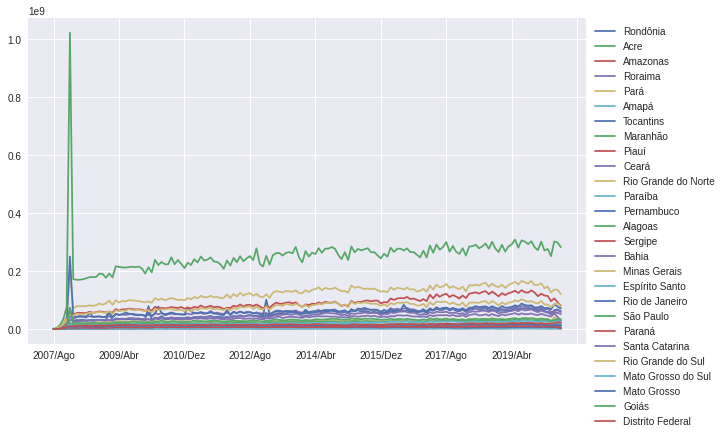

In [189]:
usable.T.plot(figsize=(10,6))
plt.legend(loc = 'best', bbox_to_anchor=(1, 1), )
plt.show()

In [190]:
estados_plot = usable.T[["São Paulo","Minas Gerais","Bahia","Pernambuco","Amazonas"]]

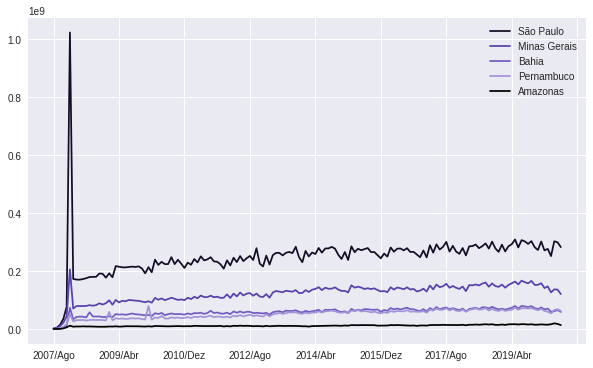

In [191]:
colors = ['#130d25','#5840ad', '#735cc3','#a394d8', 'black']
plt.style.use('seaborn')
estados_plot.plot(figsize=(10,6), color = colors)
plt.legend(loc = 'best', bbox_to_anchor=(1, 1))
plt.show()

##Formantando os números

In [192]:
pd.options.display.float_format ="{:.2f}".format

In [193]:
estados_plot

Unidade da Federação,São Paulo,Minas Gerais,Bahia,Pernambuco,Amazonas
2007/Ago,1665349.90,971394.37,135146.36,400640.85,35752.72
2007/Set,4434168.64,2861781.50,448349.75,1088340.42,45570.64
2007/Out,14577395.84,10018011.35,1382038.11,2973553.48,416012.30
2007/Nov,35032259.98,21730281.63,3348779.62,6699828.82,2020381.79
2007/Dez,76668547.41,43429517.54,11948984.56,16919031.39,5949408.99
...,...,...,...,...,...
2020/Mar,276606288.92,147078556.29,70340301.29,59628674.07,14773739.41
2020/Abr,251696362.66,126330649.86,59109689.20,53843729.23,16330913.81
2020/Mai,302857660.98,136867275.75,61756775.71,65424719.40,19441150.53
2020/Jun,299060851.62,135977571.87,65159300.63,68145110.59,17509334.66


##Plotando o Gráfico final

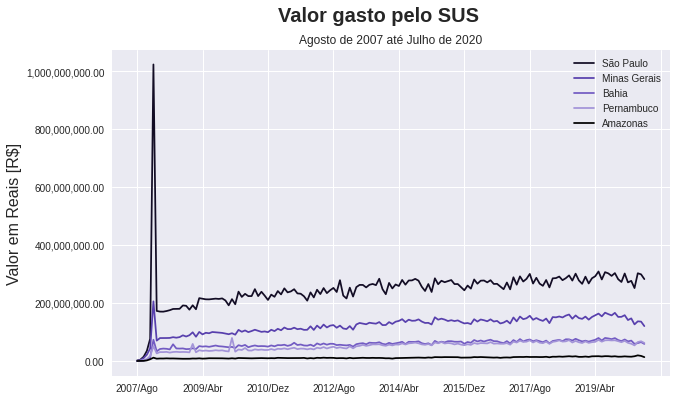

In [194]:
colors = ['#130d25','#5840ad', '#735cc3','#a394d8', 'black']
plt.style.use('seaborn')
ax = estados_plot.plot(figsize=(10,6), color = colors)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.legend(loc = 'best', bbox_to_anchor=(1, 1))
plt.title("Agosto de 2007 até Julho de 2020")
plt.suptitle("Valor gasto pelo SUS ", size=20, weight='bold' )
plt.ylabel("Valor em Reais [R$]", size = 16)
plt.show()

#Aula 03 - Manipulação de Dados

In [195]:
lista = data['id_uf'].tolist()
lista

['11 ',
 '12 ',
 '13 ',
 '14 ',
 '15 ',
 '16 ',
 '17 ',
 '21 ',
 '22 ',
 '23 ',
 '24 ',
 '25 ',
 '26 ',
 '27 ',
 '28 ',
 '29 ',
 '31 ',
 '32 ',
 '33 ',
 '35 ',
 '41 ',
 '42 ',
 '43 ',
 '50 ',
 '51 ',
 '52 ',
 '53 ']

In [196]:
regiao = []

for i in lista:
    if i[0] == '1':
        regiao.append("Norte")
    elif i[0] == '2':
        regiao.append("Nordeste")
    elif i[0] == '3':
        regiao.append("Sudeste")
    elif i[0] == '4':
        regiao.append("Sul")
    elif i[0] == '5':
        regiao.append("Centro-Oeste")
        
regiao

['Norte',
 'Norte',
 'Norte',
 'Norte',
 'Norte',
 'Norte',
 'Norte',
 'Nordeste',
 'Nordeste',
 'Nordeste',
 'Nordeste',
 'Nordeste',
 'Nordeste',
 'Nordeste',
 'Nordeste',
 'Nordeste',
 'Sudeste',
 'Sudeste',
 'Sudeste',
 'Sudeste',
 'Sul',
 'Sul',
 'Sul',
 'Centro-Oeste',
 'Centro-Oeste',
 'Centro-Oeste',
 'Centro-Oeste']

In [197]:
usable['regiao'] = regiao

usable.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,regiao
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8140639.49,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,Norte
Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,3161446.53,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,Norte
Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,13909566.03,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,Norte
Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2761536.23,2699213.85,2682746.28,2891100.20,2737677.78,26

In [198]:
'''norte = usable.query('região == "Norte"')
sul = usable.query('região == "Sul"')
suldeste = usable.query('região == "Sudeste"')
centro_o = usable.query('região == "Centro-Oeste"')
nordeste = usable.query('região == "Nordeste"')'''

'norte = usable.query(\'região == "Norte"\')\nsul = usable.query(\'região == "Sul"\')\nsuldeste = usable.query(\'região == "Sudeste"\')\ncentro_o = usable.query(\'região == "Centro-Oeste"\')\nnordeste = usable.query(\'região == "Nordeste"\')'

In [199]:
df_ord1 = df_ord.drop("Total", axis=1)

In [200]:
df_ord2 = df_ord1[:5]

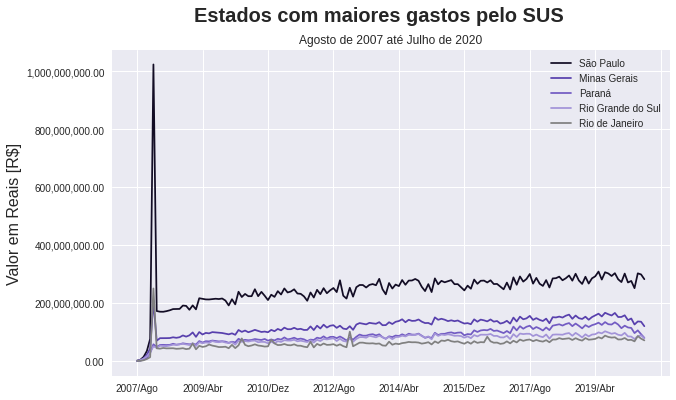

In [201]:
colors = ['#130d25','#5840ad', '#735cc3','#a394d8', 'gray']
plt.style.use('seaborn')
ax = df_ord2.T.plot(figsize=(10,6), color = colors)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.legend(loc = 'best', bbox_to_anchor=(1, 1))
plt.title("Agosto de 2007 até Julho de 2020")
plt.suptitle("Estados com maiores gastos pelo SUS ", size=20, weight='bold' )
plt.ylabel("Valor em Reais [R$]", size = 16)
plt.show()

In [202]:
test = df_ord.T['Pernambuco']

In [203]:
top6 = df_ord2.T

In [204]:
top6['Pernambuco'] = test

In [205]:
top6

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Pernambuco
2007/Ago,1665349.90,971394.37,554800.22,1049252.33,469469.34,400640.85
2007/Set,4434168.64,2861781.50,1431708.01,3182913.14,921646.57,1088340.42
2007/Out,14577395.84,10018011.35,4630402.44,8571312.11,2994664.57,2973553.48
2007/Nov,35032259.98,21730281.63,11120030.79,16592432.80,7250528.08,6699828.82
2007/Dez,76668547.41,43429517.54,28790722.87,30134255.70,13627123.27,16919031.39
...,...,...,...,...,...,...
2020/Mar,276606288.92,147078556.29,114476997.52,84651396.59,73594497.93,59628674.07
2020/Abr,251696362.66,126330649.86,96727112.19,76294596.96,68160773.35,53843729.23
2020/Mai,302857660.98,136867275.75,106103737.62,86076113.42,86281033.16,65424719.40
2020/Jun,299060851.62,135977571.87,92901461.36,89019478.82,77604925.21,68145110.59


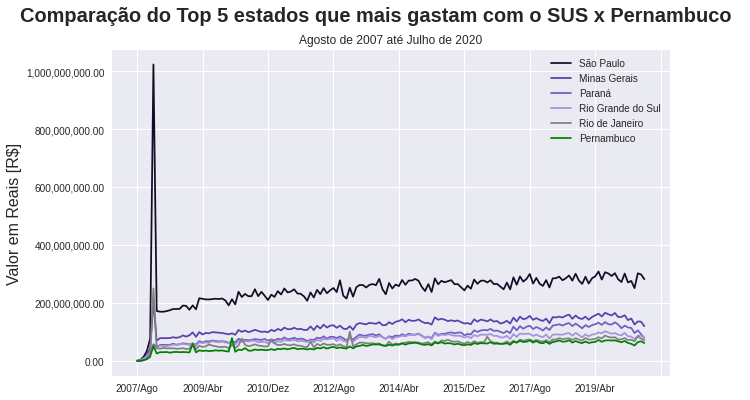

In [206]:
colors = ['#130d25','#5840ad', '#735cc3','#a394d8', 'gray', "green"]
plt.style.use('seaborn')
ax = top6.plot(figsize=(10,6), color = colors)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.legend(loc = 'best', bbox_to_anchor=(1, 1))
plt.title("Agosto de 2007 até Julho de 2020")
plt.suptitle("Comparação do Top 5 estados que mais gastam com o SUS x Pernambuco  ", size=20, weight='bold' )
plt.ylabel("Valor em Reais [R$]", size = 16)
plt.show()

In [207]:
colunas_interessadas = df_ord1.columns[6:]

In [208]:
df_ord1[colunas_interessadas].head()

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
São Paulo,172834914.73,170481849.56,170278285.95,172402180.59,175416595.83,179525002.10,179898070.22,180082203.71,191685220.08,190539738.80,177086380.69,192321557.36,178596376.79,216951591.57,215053018.45,212890248.16,212670900.80,214041237.42,215212536.08,214135444.45,216056582.61,208973892.04,192127099.10,213467885.76,195784795.23,239323932.16,221172991.21,231777549.43,223933798.66,224067914.11,248010130.51,224052980.08,238935452.74,225484059.46,210611460.51,229087002.84,221598043.65,241399914.84,229821234.45,250793569.77,...,263471759.13,292113404.78,274301073.14,283534617.42,300593738.96,267297243.95,287114784.48,267113249.04,259451685.90,279497570.89,254004628.07,285270559.62,286191965.06,291440947.02,278926018.36,285851919.68,295419311.15,277576166.24,301454867.05,278114302.44,266239800.80,291081406.59,267662508.70,285576312.72,292584828.35,308925598.24,281405146.78,306633987.91,302367276.77,293685713.15,303382527.10,282391773.21,272697695.04,301991167.67,271356784.04,276606288.92,251696362.66,302857660.98,299060851.62,282709570.31
Minas Gerais,70301089.50,79119005.51,79046322.41,79268070.12,79608652.53,82200224.47,80374117.08,82400146.79,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100240651.84,91831325.37,97289703.07,95723396.53,100050008.70,98968064.76,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100829767.38,105485567.80,99666115.96,103356995.64,107844259.69,104341138.19,100525403.88,101943625.50,99538953.60,107738915.82,103140773.07,111065995.94,106094329.28,115487199.35,...,136715099.44,153412119.69,144291438.09,147533496.74,156055553.43,142285103.84,148306094.14,142323944.76,138341191.84,146501618.07,130702126.27,151496245.19,150687602.95,153589259.44,150251751.37,156633990.16,160420043.49,145941007.54,157247579.70,148172783.99,145387240.73,153177305.19,142669153.77,151943630.56,157922598.68,163591461.79,154114822.71,166735650.41,161707825.05,157419731.93,166133803.32,152106660.17,152398599.06,158097903.98,141323175.61,147078556.29,126330649.86,136867275.75,135977571.87,120467187.34
Paraná,48855046.46,55611791.07,56115135.82,55574831.93,56094754.74,59802402.07,56699001.13,58091985.79,61365941.22,59667208.62,57816197.74,60381593.99,57239101.63,69070488.20,64054678.26,68685542.95,67931227.06,70958762.64,69225783.96,67849968.52,68558209.28,67158496.97,63094274.28,66902643.63,64501133.64,77138870.60,70755396.99,73456756.71,71839020.89,73013830.77,76151006.95,74240963.45,73042386.70,76364750.27,70517638.39,74712784.07,71314740.25,76914668.09,74232937.37,81709021.05,...,106027687.78,120535312.96,111725261.22,118590172.07,122122835.72,110656147.72,117567691.91,112457522.94,105558123.29,116133193.49,107075982.24,122331354.51,124731345.17,127073853.11,122616924.02,127991900.80,131257163.40,120647377.43,129530163.96,121810669.26,112984630.73,124159239.68,117715473.32,123907372.22,127447033.66,132576563.13,124858292.37,134621315.53,127174095.05,126172679.50,133847978.48,126209369.22,113545318.91,122268754.10,116061602.52,114476997.52,96727112.19,106103737.62,92901461.36,80320852.69
Rio Grande do Sul,45897704.82,52928695.92,51972416.77,51679350.79,53759674.01,5

In [209]:
 df_limpo = df_ord[colunas_interessadas]

In [210]:
 df_limpo2 = df_ord2[colunas_interessadas]

In [211]:
pernambuco = df_limpo.T['Pernambuco']

top6 = df_limpo2.T

top6['Pernambuco'] = pernambuco

top6

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Pernambuco
2008/Fev,172834914.73,70301089.50,48855046.46,45897704.82,44122593.19,26222079.10
2008/Mar,170481849.56,79119005.51,55611791.07,52928695.92,42892665.52,30716361.81
2008/Abr,170278285.95,79046322.41,56115135.82,51972416.77,45295962.86,30589332.79
2008/Mai,172402180.59,79268070.12,55574831.93,51679350.79,43951349.46,31409553.23
2008/Jun,175416595.83,79608652.53,56094754.74,53759674.01,44102925.77,28947510.92
...,...,...,...,...,...,...
2020/Mar,276606288.92,147078556.29,114476997.52,84651396.59,73594497.93,59628674.07
2020/Abr,251696362.66,126330649.86,96727112.19,76294596.96,68160773.35,53843729.23
2020/Mai,302857660.98,136867275.75,106103737.62,86076113.42,86281033.16,65424719.40
2020/Jun,299060851.62,135977571.87,92901461.36,89019478.82,77604925.21,68145110.59


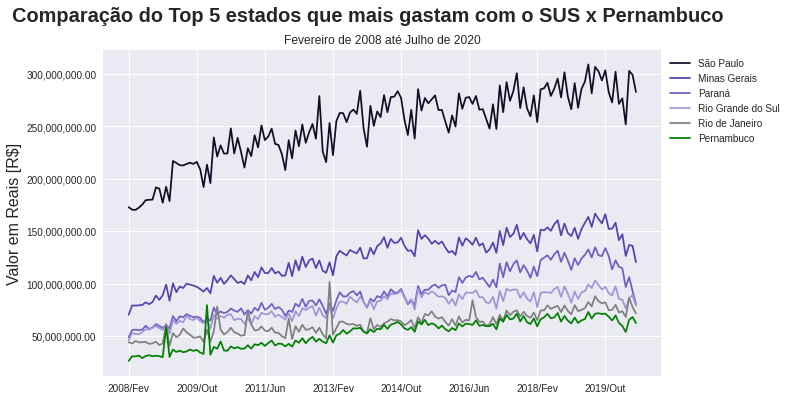

In [212]:
colors = ['#130d25','#5840ad', '#735cc3','#a394d8', 'gray', "green"]
plt.style.use('seaborn')
ax = top6.plot(figsize=(10,6), color = colors)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.legend(loc = 'best', bbox_to_anchor=(1, 1))
plt.title("Fevereiro de 2008 até Julho de 2020")
plt.suptitle("Comparação do Top 5 estados que mais gastam com o SUS x Pernambuco  ", size=20, weight='bold' )
plt.ylabel("Valor em Reais [R$]", size = 16)
plt.show()

In [213]:
usable

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,regiao
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8140639.49,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,Norte
Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,3161446.53,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,Norte
Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,13909566.03,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,Norte
Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2761536.23,2699213.85,2682746.28,2891100.20,2737677.78,26

In [214]:
colunas_limpeza = usable.columns[6:]

In [215]:
dados_limpos = usable[colunas_limpeza]

In [216]:
dados_limpos.head()

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,regiao
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Rondônia,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,4384430.09,4173529.95,4293085.61,4674947.02,5087527.81,4724192.54,...,8140639.49,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,Norte
Acre,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,2500589.76,2749521.65,2473515.82,2801446.23,2672803.31,3135521.30,...,3161446.53,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,Norte
Amazonas,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,9335803.05,9800511.52,9461664.54,10954545.77,10529645.04,10105494.01,...,13909566.03,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,Norte
Roraima,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,1485166.60,1604886.45,1220176.72,1276120.86,1379942.19,1679122.67,...,2761536.23,2699213.85,26

In [217]:
regiao_data = dados_limpos.groupby(['regiao']).sum()

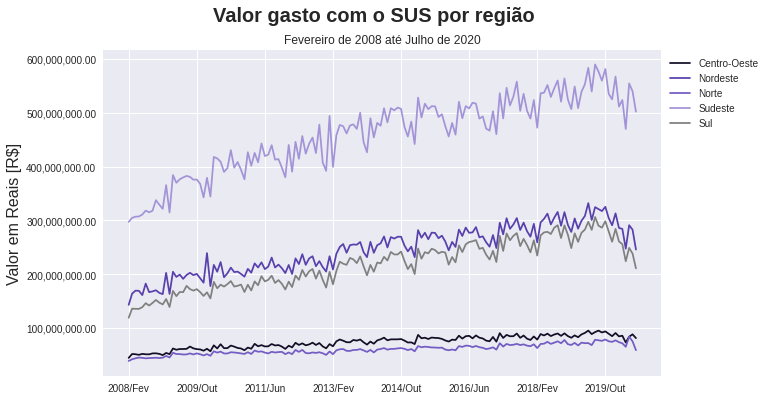

In [218]:
colors = ['#130d25','#5840ad', '#735cc3','#a394d8', 'gray', "green"]
plt.style.use('seaborn')
ax = regiao_data.T.plot(figsize=(10,6), color = colors)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.legend(loc = 'best', bbox_to_anchor=(1, 1))
plt.title("Fevereiro de 2008 até Julho de 2020")
plt.suptitle("Valor gasto com o SUS por região", size=20, weight='bold' )
plt.ylabel("Valor em Reais [R$]", size = 16)
plt.show()

In [219]:
suldeste = dados_limpos.query('regiao == "Sudeste"')
suldeste

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,regiao
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Minas Gerais,70301089.50,79119005.51,79046322.41,79268070.12,79608652.53,82200224.47,80374117.08,82400146.79,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100240651.84,91831325.37,97289703.07,95723396.53,100050008.70,98968064.76,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100829767.38,105485567.80,99666115.96,103356995.64,107844259.69,104341138.19,100525403.88,101943625.50,99538953.60,107738915.82,103140773.07,111065995.94,106094329.28,115487199.35,...,153412119.69,144291438.09,147533496.74,156055553.43,142285103.84,148306094.14,142323944.76,138341191.84,146501618.07,130702126.27,151496245.19,150687602.95,153589259.44,150251751.37,156633990.16,160420043.49,145941007.54,157247579.70,148172783.99,145387240.73,153177305.19,142669153.77,151943630.56,157922598.68,163591461.79,154114822.71,166735650.41,161707825.05,157419731.93,166133803.32,152106660.17,152398599.06,158097903.98,141323175.61,147078556.29,126330649.86,136867275.75,135977571.87,120467187.34,Sudeste
Espírito Santo,10032886.43,12262049.08,12453466.98,11789786.09,11889687.35,12205584.14,12384068.19,12486952.61,12846257.93,12885677.54,12531576.01,13448667.55,11902752.05,14490295.47,14203837.61,15160988.21,14348102.03,15198601.34,15633491.30,14884339.35,14470016.36,14561150.72,13832954.49,14019840.33,13041820.98,16875676.05,15184135.29,15913263.87,15189197.44,15929495.86,17000988.44,16055300.15,16763684.01,16487379.66,15459495.21,16030031.21,15811419.60,17702137.74,16397384.20,17707422.11,...,26707993.40,25313642.38,26021925.50,26797874.70,25336305.29,26875836.29,25257656.90,24276121.39,25480248.19,22686672.67,25266729.61,25975106.39,27444564.56,24444622.13,25716796.37,25498522.61,24338227.14,26158845.99,24671664.41,24683685.86,25201039.31,24710171.75,26740727.97,25981058.40,28690916.87,25936888.97,28550512.79,29298721.79,27429269.40,29709557.40,26236636.40,25163041.42,27533550.66,26542802.84,26555688.68,23735724.64,28614683.75,27450865.16,27460475.47,Sudeste
Rio de Janeiro,44122593.19,42892665.52,45295962.86,43951349.46,44102925.77,44348520.04,42487939.51,43066461.47,44553314.55,41351511.51,43009787.04,60870400.36,40657841.56,52749369.57,48895602.42,51167129.65,57231407.48,53485657.68,51220661.43,48481294.83,48667996.09,49685211.69,44407856.80,55993709.91,44820454.33,54457993.44,78118096.31,56007801.98,51435826.33,53861284.43,57867285.17,53736019.37,52371157.05,50220615.43,50891328.43,74005618.29,61109436.88,55320998.84,55806371.23,59071370.86,...,74317064.87,69854028.57,73154854.55,74541924.99,68729446.80,73084899.63,69260882.71,67316622.13,72339878.22,65017051.87,74386639.12,74518096.30,79259775.09,75907708.63,77486691.97,78784068.69,72837645.52,79138170.66,73946904.94,70688186.20,79468378.91,73795013.14,74919398.28,76666971.33,82440728.47,78190652.12,87984485.17,83311603.59,81146690.63,82247728.87,74620476.61,74895861.63,79705663.75,72412810.42,73594497.93,68160773.35,86281033.16,77604925.21,71540227.33,Sudeste
São Paulo,172834914.73,170481849.56,170278285.95,172402180.59,175416595.83,179525002.10,179898070.22,180082203.71,191685220.08,190539738.80,177086380.69,192321557.36,178596376.79,216951591.57,215053

In [220]:
suldeste = suldeste.drop('regiao', axis=1)

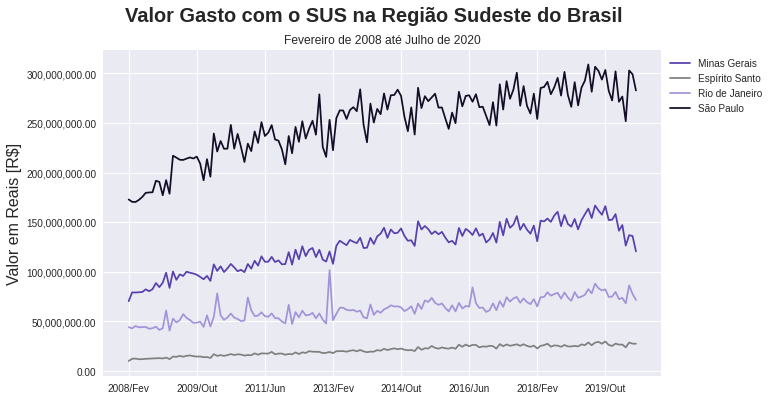

In [221]:
colors = ['#5840ad','gray','#a394d8', '#130d25']
plt.style.use('seaborn')
ax = suldeste.T.plot(figsize=(10,6), color = colors)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.legend(loc = 'best', bbox_to_anchor=(1, 1))
plt.title("Fevereiro de 2008 até Julho de 2020")
plt.suptitle("Valor Gasto com o SUS na Região Sudeste do Brasil", size=20, weight='bold' )
plt.ylabel("Valor em Reais [R$]", size = 16)

plt.show()

#Aula 05 - Manipulação e interpretação dos Gráficos

In [225]:
mes_recente = suldeste.columns[-1]
mes_recente

'2020/Jul'

In [237]:
 gasto_mes_recente=  suldeste[mes_recente] 
 gasto_mes_recente =(gasto_mes_recente / 1000000).sort_values(ascending = False)
 gasto_mes_recente.head()

Unidade da Federação
São Paulo        282.71
Minas Gerais     120.47
Rio de Janeiro    71.54
Espírito Santo    27.46
Name: 2020/Jul, dtype: float64

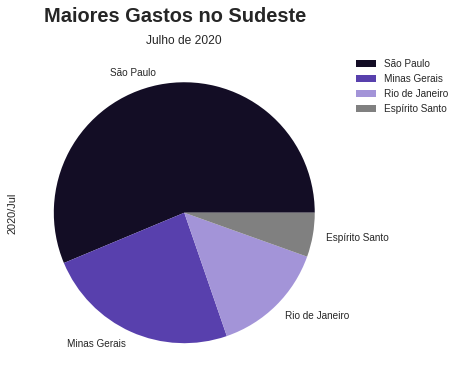

In [251]:
 colors = ['#130d25','#5840ad','#a394d8' ,'gray']
plt.style.use('seaborn')
ax = gasto_mes_recente.plot.pie(figsize=(10,6), colors = colors)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.legend(loc = 'best', bbox_to_anchor=(1, 1))
plt.title("Julho de 2020")
plt.suptitle("Maiores Gastos no Sudeste", size=20, weight='bold' )
plt.show()

In [253]:
gasto_mes_recente / gasto_mes_recente.loc['Rio de Janeiro']*100

Unidade da Federação
São Paulo        395.18
Minas Gerais     168.39
Rio de Janeiro   100.00
Espírito Santo    38.38
Name: 2020/Jul, dtype: float64

In [254]:
gasto_mes_recente / gasto_mes_recente.loc['São Paulo']*100

Unidade da Federação
São Paulo        100.00
Minas Gerais      42.61
Rio de Janeiro    25.31
Espírito Santo     9.71
Name: 2020/Jul, dtype: float64

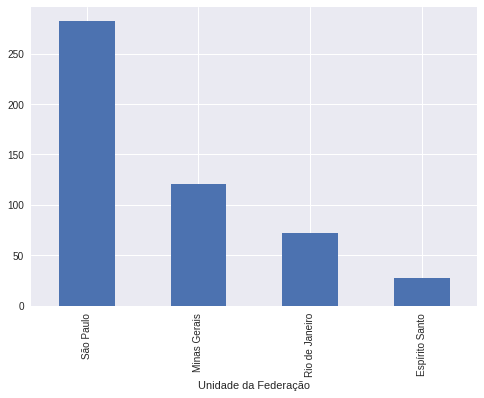

In [258]:
gasto_mes_recente.plot( kind ='bar')

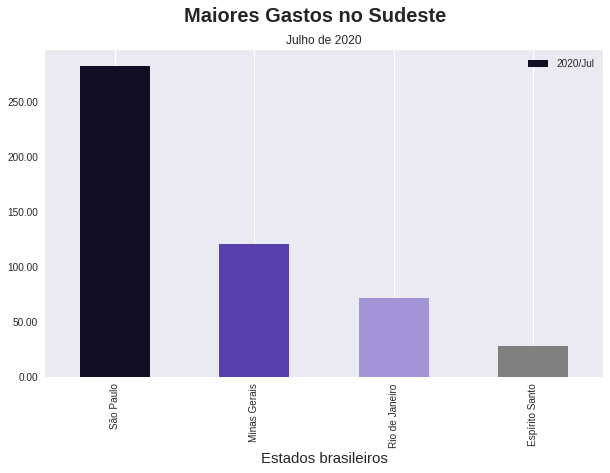

In [272]:
colors = ['#130d25','#5840ad','#a394d8' ,'gray']
plt.style.use('seaborn')
ax = gasto_mes_recente.plot(figsize=(10,6),kind ='bar', color = colors)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.legend(loc = 'best', bbox_to_anchor=(1, 1))
plt.xlabel("Estados brasileiros", size = 15)
plt.title("Julho de 2020")
plt.grid(axis = 'y')
plt.suptitle("Maiores Gastos no Sudeste", size=20, weight='bold' )
plt.show()